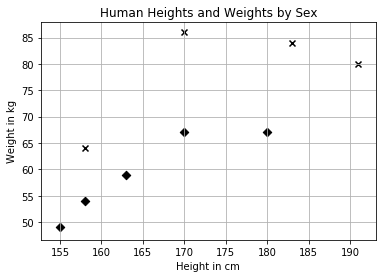

In [2]:
# KNN(k-nearest neighbors) uses representations of neighbors in a 
# metric/feature space, meaning all distances b/w members of a set are
# defined. Mode of KNN labels in tuples is used to classify test instances.
# K is often set to and odd number to avoid ties.
# Lookup KNN vs Simple Linear Regression for more information

# Classification problem: predict a person's sex using height and weight.
# Uses two features from two explanatory variables (w & h) to predict the
# value of the response variable. KNN is not limited to 2 features, but
# more than 3 features cannot be visualized.
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

# Plot the raw data on a scatter plot
# Men are denoted with 'x' markers while women are plotted with 'diamond' markers
for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

In [3]:
# First we must define our distance measure.  Here we are using Euclidean distance:
# the straight line distance between points in Euclidean space. Distance formular is as follows:
# d(p,q) = d(q,p) = sqrt( sqr(q1-p1) + sqr(q2-p2) )
# x is the query point and distances are distance of training points to x
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [4]:
# set k to 3 and select 3 nearest training instances to x
nearest_neighbor_indicies = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indicies)
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [5]:
# Count the type of each point closes to the query point and most common result is predicted
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

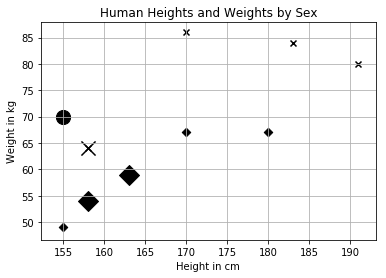

In [6]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

# Plot the raw data on a scatter plot
# Men are denoted with 'x' markers while women are plotted with 'diamond' markers
# 'o' marker shows the query point
for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=200, c='k', marker='x')
plt.scatter(163, 59, s=200, c='k', marker='D')
plt.scatter(158, 54, s=200, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='o')
plt.grid(True)
plt.show()

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

# fit_transform first creates a mapping from label strings to integers (fit) and then applies
# mapping to input labels. Transformer should only be fit on training set and independent fitting
# and transforming could lead to inconsistent mappings.
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [8]:
# Call fit and predicted, just as in Simple Linear Regression
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]

# Reverse Binarization and return a string label
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

In [10]:
# Define test data to test classifier and binarize
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])

y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

# Predict test data output (this one incorrectly predicts that the first male is female)
predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [12]:
# Calculate accuracy of the test
# Accuracy is the proportion of test instances that were classified correctly
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


In [13]:
# Calculate precision of the test
# Precision is the proportion of test instances that were true positives
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


In [15]:
# Calculate Recall
# Recall is the proportion of truely positive test instances that were predicted to be positive
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


In [16]:
# Calculate F1 Score
# F1 score is the harmonic mean of precision and recall
from sklearn.metrics import f1_score
print('F1 Score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 Score: 0.6666666666666666


In [17]:
# Calculate MCC
# Matthew Correlation Coefficient is an alternative to the F1 score for measuring the preformance
# of binary classifiers. Perfect classifier has an MCC=1, Random Classifier has an MCC=0, and a
# Perfectly Wrong Classifier has an MCC=-1.
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized,
                                                                 predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized,
                            target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2

